## Data preprocessing and topic modeling (some functions were copied from Metis data science teaching materials)

In [1]:
from collections import OrderedDict
import string
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

import re

import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
path = 'data/'
df_train1 = pd.read_csv(path+'Corona_NLP_train.csv', encoding='latin-1')
df_train2 = pd.read_csv(path+'Corona_NLP_test.csv')
df_train1.info()
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+

In [3]:
frames = [df_train1, df_train2]
df_train = pd.concat(frames, ignore_index=True, sort=False)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Data Preprocessing

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiasongsun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jiasongsun/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
import unidecode
import unicodedata
Lanc = LancasterStemmer()
def containsNumber(value):
    for character in value:
        if character.isdigit():
            return True
    return False

In [7]:
def clean_data(text):
    text = str(text).strip()
    text = text.replace("?","")
    text = re.sub(r"http\S+","",text)
    text = re.sub(r"@\w+","",text)
    text = re.sub(r"#\w+","",text)
    text = re.sub(r"\d+","",text)
    text = re.sub(r"<.*?>","",text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub('(([\\xbc-\\xbe])?)', '', text) 
    text = re.sub(r'[àáâãäå]', '', text)
    text = re.sub(r'[èéêë]', '', text)
    text = re.sub(r'[ìíîï]', '', text)
    text = re.sub(r'[òóôõö]', '', text)
    text = re.sub(r'[ùúûü]', '', text)
    text = Lanc.stem(text)
    text = text.split()
    #text = " ".join([word for word in text if [char in word isnumeric()]])
    text = " ".join([word for word in text if not word in stop_words])
    text = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    #text = str(text).strip()
    return text

In [8]:
stop_words = stopwords.words('english')
df_train["OriginalTweet"]  = df_train['OriginalTweet'].apply(lambda x:x.lower())

In [9]:
df_train["OriginalTweet"] = df_train['OriginalTweet'].apply(lambda x : clean_data(x))

In [10]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,Neutral
1,3800,48752,UK,16-03-2020,advice talk family exchange phone create conta...,Positive
2,3801,48753,Vagabonds,16-03-2020,give elderly disabled shopping amid covid outb...,Positive
3,3802,48754,NaN,16-03-2020,food stock one empty please panic enough food ...,Positive
4,3803,48755,NaN,16-03-2020,ready go supermarket outbreak paranoid food st...,Extremely Negative


In [11]:
df = df_train.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35531 entries, 0 to 44954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       35531 non-null  int64 
 1   ScreenName     35531 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        35531 non-null  object
 4   OriginalTweet  35531 non-null  object
 5   Sentiment      35531 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [12]:
df.OriginalTweet

0                                                         
1        advice talk family exchange phone create conta...
2        give elderly disabled shopping amid covid outb...
5        news first confirmed covid case came county la...
6        cashier grocery store prove credibility civics...
                               ...                        
44949    call general assembly enact legal stay debt co...
44950    meanwhile supermarket people dance sing togeth...
44951    panic buy lot non perishable echo needs food a...
44952    prof economics talking recent research impact ...
44954    safety end covid rest assured tissue produce ship
Name: OriginalTweet, Length: 35531, dtype: object

In [13]:
df['OriginalTweet'].replace('', np.nan, inplace=True)

/Users/jiasongsun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
df.OriginalTweet

0                                                      NaN
1        advice talk family exchange phone create conta...
2        give elderly disabled shopping amid covid outb...
5        news first confirmed covid case came county la...
6        cashier grocery store prove credibility civics...
                               ...                        
44949    call general assembly enact legal stay debt co...
44950    meanwhile supermarket people dance sing togeth...
44951    panic buy lot non perishable echo needs food a...
44952    prof economics talking recent research impact ...
44954    safety end covid rest assured tissue produce ship
Name: OriginalTweet, Length: 35531, dtype: object

In [15]:
df.dropna(inplace = True)

/Users/jiasongsun/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice talk family exchange phone create conta...,Positive
2,3801,48753,Vagabonds,16-03-2020,give elderly disabled shopping amid covid outb...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,news first confirmed covid case came county la...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier grocery store prove credibility civics...,Positive
7,3806,48758,Austria,16-03-2020,supermarket today buy toilet paper,Neutral


In [17]:
df_t = df.drop(['UserName','ScreenName','Location','TweetAt'],axis =1)

In [19]:
df_t.head()

,OriginalTweet,Sentiment
1,advice talk family exchange phone create conta...,Positive
2,give elderly disabled shopping amid covid outb...,Positive
5,news first confirmed covid case came county la...,Positive
6,cashier grocery store prove credibility civics...,Positive
7,supermarket today buy toilet paper,Neutral


In [20]:
df_s = df.drop(['UserName','ScreenName','Location'],axis =1)

In [21]:
df_s.head()

,TweetAt,OriginalTweet,Sentiment
1,16-03-2020,advice talk family exchange phone create conta...,Positive
2,16-03-2020,give elderly disabled shopping amid covid outb...,Positive
5,16-03-2020,news first confirmed covid case came county la...,Positive
6,16-03-2020,cashier grocery store prove credibility civics...,Positive
7,16-03-2020,supermarket today buy toilet paper,Neutral


In [23]:
df_s.to_csv(r'data_s.txt')

### Prepare data for modeling

In [24]:
# Split the data into X and y data sets
X = df_t.OriginalTweet
y = df_t.Sentiment

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
cv1 = CountVectorizer(stop_words='english',max_df=1.0, min_df=1)

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,aa,aba,abandon,abandoned,abate,abatement,abbey,abide,abiding,ability,...,zip,zo,zoa,zoic,zombie,zone,zoning,zoo,zoom,zoonotic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# new TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import Stemmer
english_stemmer = Stemmer.Stemmer('en')
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: english_stemmer.stemWords(analyzer(doc))
     
tfidf = StemmedTfidfVectorizer(min_df=1, stop_words='english', analyzer='word', ngram_range=(1,1))

#cv_tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()
pd.DataFrame(X_train_tfidf, columns=tfidf.get_feature_names())

,aa,aba,abandon,abat,abbey,abid,abil,abl,abod,abolish,...,zinc,zip,zo,zoa,zoic,zombi,zone,zoo,zoom,zoonot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Topic Modeling

#### NMF-cv

In [29]:
X_train_cv1

<24800x10682 sparse matrix of type '<class 'numpy.int64'>'
	with 236017 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.decomposition import NMF
from numpy.random import RandomState
selected_components = 5
docs = X_train_cv1
rng = RandomState(0)
nmf_5 = NMF(n_components=selected_components,alpha=0.1, max_iter=1000, random_state=42)
doc_topic = nmf_5.fit_transform(docs)

/Users/jiasongsun/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [104]:
nmf_5.components_.shape

(5, 10682)

In [35]:
terms1=cv1.get_feature_names()

In [37]:
def get_top_terms(topic, n_terms, nmf=nmf_5, terms=terms1):
    # get the topic components (i.e., term weights)
    components = nmf.components_[topic, :]

    # get term indices, sorted (descending) by topic weights
    top_term_indices = components.argsort()[-n_terms:]
    
    # use the `terms` array to get the actual top terms
    top_terms = np.array(terms)[top_term_indices]
    
    return top_terms.tolist()

In [107]:
get_top_terms(0, selected_components,terms=terms1)

['need', 'demand', 'stock', 'panic', 'food']

In [108]:
# define the topics
topics = [', '.join(get_top_terms(i, 5,terms=terms1)) for i in range(selected_components)]
topics

['need, demand, stock, panic, food',
 'retail, going, like, grocery, store',
 'oil, shopping, pandemic, consumer, covid',
 'time, like, local, staff, supermarket',
 'like, panic, need, shopping, people']

#### NMF - Tfidf

In [41]:
selected_components = 5
docs = X_train_tfidf
rng = RandomState(0)
nmf_5t = NMF(n_components=selected_components,alpha=0.1, max_iter=200, random_state=42)
nmf_5t.fit_transform(docs)

/Users/jiasongsun/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.17210712e-01,
        0.00000000e+00],
       [1.13102240e-02, 4.66498061e-03, 1.99626149e-02, 2.03805595e-02,
        1.03951207e-03],
       [0.00000000e+00, 1.10722488e-03, 2.43293656e-02, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [2.09784329e-04, 9.83653964e-04, 1.76292367e-03, 6.58620499e-04,
        1.15401760e-03],
       [7.96177557e-02, 0.00000000e+00, 1.78411557e-02, 3.51780816e-02,
        0.00000000e+00],
       [4.47029605e-03, 8.09157811e-02, 1.72489595e-02, 1.12347588e-02,
        9.97321893e-05]])

In [42]:
terms2=tfidf.get_feature_names()

In [43]:
get_top_terms(0, selected_components,nmf=nmf_5t,terms=terms2)

['demand', 'need', 'panic', 'stock', 'food']

In [44]:
# define the topics
topics = [', '.join(get_top_terms(i, 15,nmf=nmf_5t,terms=terms2)) for i in range(selected_components)]
topics

['time, covid, dont, hoard, bank, help, stop, suppli, buy, peopl, demand, need, panic, stock, food',
 'went, local, line, shop, today, day, time, retail, thank, peopl, like, go, work, groceri, store',
 'protect, retail, demand, outbreak, amid, behavior, oil, new, help, crisi, impact, pandem, shop, consum, covid',
 'today, social, need, thank, go, home, day, local, like, staff, time, work, shop, peopl, supermarket',
 'buy, like, sell, went, shortag, make, use, hoard, water, clean, roll, peopl, hand, toilet, paper']

#### LSA-cv

In [129]:
from sklearn.decomposition import TruncatedSVD

In [130]:
lsa_cv = TruncatedSVD(n_components=5, n_iter=200, random_state=42)
lsa_cv.fit(X_train_cv1)

TruncatedSVD(n_components=5, n_iter=200, random_state=42)

In [131]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [132]:
display_topics(lsa_cv, cv1.get_feature_names(), 5);


Topic  1
covid, food, store, grocery, people

Topic  2
store, grocery, going, like, retail

Topic  3
food, people, panic, stock, need

Topic  4
supermarket, people, shopping, like, home

Topic  5
people, consumer, shopping, behavior, help




#### LSA-Tfidf

In [133]:
lsa_Tfidf = TruncatedSVD(n_components=5, n_iter=200, random_state=42)
lsa_Tfidf.fit(X_train_tfidf)

TruncatedSVD(n_components=5, n_iter=200, random_state=42)

In [134]:
display_topics(lsa_Tfidf, tfidf.get_feature_names(), 5);


Topic  1
store, groceri, covid, food, peopl

Topic  2
store, groceri, go, thank, line

Topic  3
consum, covid, pandem, impact, behavior

Topic  4
supermarket, shop, consum, work, covid

Topic  5
paper, toilet, consum, hand, roll




In [57]:
df_wc = get_top_terms(0, 20)

In [58]:
from wordcloud import WordCloud, STOPWORDS

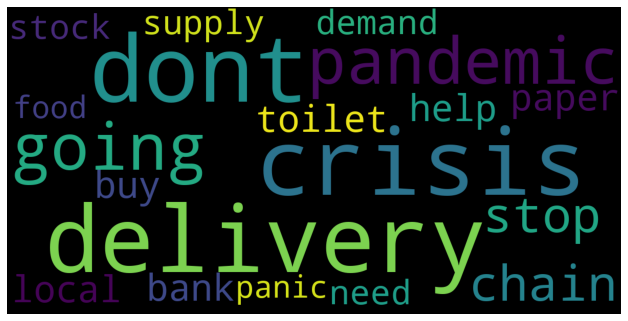

In [64]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black', max_words=100, max_font_size=60, min_font_size=5,
                          scale=3, random_state=1).generate(str(data).replace("'",' '))

    fig = plt.figure(1, figsize=(11, 11))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    wordcloud.to_file("./WordCloud.png")
           
show_wordcloud(df_wc)

### Time Series

In [66]:
df_ts = df.drop(['UserName','ScreenName','Location','OriginalTweet'],axis =1)
df_ts.head()

,TweetAt,Sentiment
1,16-03-2020,Positive
2,16-03-2020,Positive
5,16-03-2020,Positive
6,16-03-2020,Positive
7,16-03-2020,Neutral


In [71]:
df_ts['Counts'] = np.zeros(len(df_ts))
df_ts.groupby(['TweetAt','Sentiment']).count()

Counts
TweetAt    Sentiment                 
01-04-2020 Extremely Negative      66
           Extremely Positive      75
           Negative               126
           Neutral                 96
           Positive               138
...                               ...
31-03-2020 Extremely Negative      29
           Extremely Positive      39
           Negative                71
           Neutral                 35
           Positive                79

[203 rows x 1 columns]

In [72]:
df_ts.to_csv('./out.csv')  

In [75]:
df_ts.Sentiment = preprocessing.label_binarize(df_ts.Sentiment, classes=[0, 1, 2, 3,4])

In [76]:
df_ts.head()

,TweetAt,Sentiment
1,16-03-2020,0
2,16-03-2020,0
5,16-03-2020,0
6,16-03-2020,0
7,16-03-2020,0


### Count Vectorizer

In [87]:
import string
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
docs = df_train.OriginalTweet

In [89]:
docs

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia: woolworths give elderly...
3        food stock one empty... please, panic, enough ...
4        me, ready go supermarket outbreak. i'm paranoi...
                               ...                        
44950    meanwhile supermarket israel -- people dance s...
44951    panic buy lot non-perishable items echo needs ...
44952    asst prof economics talking recent research co...
44953    gov need somethings instead biar je rakyat ass...
44954    members committed safety employees end-users. ...
Name: OriginalTweet, Length: 44955, dtype: object

In [94]:
sum([len(d.split(' ')) for d in docs])

737428

In [90]:
vec = CountVectorizer()
doc_term = vec.fit_transform(docs)
doc_term.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [91]:
pd.unique(doc_term.toarray().reshape(-1))

array([ 0,  1,  2,  3,  4,  6,  5,  7, 11,  8,  9])

In [45]:
vec.vocabulary_

{'menyrbie': 48195,
 'phil_gahan': 57164,
 'chrisitv': 16863,
 'https': 36394,
 'co': 17670,
 'ifz9fan2pa': 37372,
 'and': 8675,
 'xx6ghgfzcc': 82584,
 'i2nlzdxno8': 36882,
 'advice': 7198,
 'talk': 71871,
 'to': 73879,
 'your': 83463,
 'neighbours': 51502,
 'family': 28263,
 'exchange': 27545,
 'phone': 57212,
 'numbers': 53079,
 'create': 20232,
 'contact': 18640,
 'list': 45059,
 'with': 80801,
 'of': 53855,
 'schools': 65798,
 'employer': 26393,
 'chemist': 16546,
 'gp': 32977,
 'set': 66578,
 'up': 76821,
 'online': 54453,
 'shopping': 67211,
 'accounts': 6786,
 'if': 37325,
 'poss': 58233,
 'adequate': 7036,
 'supplies': 70961,
 'regular': 62278,
 'meds': 48017,
 'but': 14443,
 'not': 52645,
 'over': 55217,
 'order': 54789,
 'coronavirus': 19173,
 'australia': 10164,
 'woolworths': 81103,
 'give': 32228,
 'elderly': 26063,
 'disabled': 23244,
 'dedicated': 22112,
 'hours': 36133,
 'amid': 8490,
 'covid': 19706,
 '19': 977,
 'outbreak': 55100,
 'binca9vp8p': 12395,
 'my': 50495,
 

In [93]:
vec

CountVectorizer()

In [46]:
doc_term.shape

(44955, 84963)

In [47]:
df_train.shape

(44955, 6)

In [48]:
vec = CountVectorizer(binary=True)
doc_term = vec.fit_transform(docs)

doc_term.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
pd.unique(doc_term.toarray().reshape(-1))

array([0, 1])

In [50]:
i = 0

doc = pd.Series(name=docs[i],
                data=doc_term.toarray()[i], 
                index=vec.get_feature_names()).sort_values(ascending=False)

doc[:20]

menyrbie      1
and           1
https         1
i2nlzdxno8    1
co            1
phil_gahan    1
chrisitv      1
ifz9fan2pa    1
xx6ghgfzcc    1
pel9qzmwei    0
pellawaits    0
pell          0
peligro       0
pelegrã       0
pejlfcowwk    0
pekulwjjgo    0
pellets       0
peipoli       0
peipbhjdup    0
peihs         0
Name: @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8, dtype: int64

In [51]:
docs[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [54]:
vec = TfidfVectorizer()

In [55]:
doc_term = vec.fit_transform(docs.values)
doc_term.shape

(44955, 84963)

In [56]:
i = 0

doc = pd.Series(name=docs[i],
                data=doc_term.toarray()[i], 
                index=vec.get_feature_names()) \
        .sort_values(ascending=False)

doc.head()

menyrbie      0.394089
i2nlzdxno8    0.394089
phil_gahan    0.394089
ifz9fan2pa    0.394089
xx6ghgfzcc    0.394089
Name: @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8, dtype: float64

#### Remove "the", "is"

In [57]:
vec = CountVectorizer(stop_words='english',max_df=0.8)

In [58]:
doc_term = vec.fit_transform(docs)

doc_term.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [59]:
'the' in vec.get_feature_names()
'is' in vec.get_feature_names()

False

In [60]:
doc_term.shape

(44955, 84659)

In [63]:
vec.vocabulary_

{'menyrbie': 48047,
 'phil_gahan': 56968,
 'chrisitv': 16805,
 'https': 36269,
 'ifz9fan2pa': 37244,
 'xx6ghgfzcc': 82286,
 'i2nlzdxno8': 36756,
 'advice': 7195,
 'talk': 71644,
 'neighbours': 51340,
 'family': 28175,
 'exchange': 27457,
 'phone': 57016,
 'numbers': 52904,
 'create': 20170,
 'contact': 18580,
 'list': 44917,
 'schools': 65597,
 'employer': 26315,
 'chemist': 16488,
 'gp': 32870,
 'set': 66372,
 'online': 54272,
 'shopping': 67003,
 'accounts': 6784,
 'poss': 58036,
 'adequate': 7033,
 'supplies': 70736,
 'regular': 62078,
 'meds': 47869,
 'order': 54605,
 'coronavirus': 19113,
 'australia': 10132,
 'woolworths': 80806,
 'elderly': 25988,
 'disabled': 23178,
 'dedicated': 22048,
 'hours': 36010,
 'amid': 8474,
 'covid': 19644,
 '19': 977,
 'outbreak': 54909,
 'binca9vp8p': 12345,
 'food': 29735,
 'stock': 69860,
 'don': 23956,
 'panic': 55716,
 'need': 51271,
 'stay': 69467,
 'calm': 14974,
 'safe': 64739,
 'covid19france': 19685,
 'covid_19': 19809,
 'covid19': 19651,


### Stemming

In [66]:
stemmer = SnowballStemmer("english")

In [70]:
def prep(word, stemmer=None):
    
    with open('./stop_words_english.txt', 'r') as f:
        stopwords = [s.strip() for s in f.readlines()]
        
    if word.lower() in stopwords:
        return None
    
    elif stemmer is None:
        return word.lower()
    
    else:
        return stemmer.stem(word)

In [71]:
vec = CountVectorizer(stop_words='english',
                      min_df=1,  # This is default; this is just a reminder it exists
                      max_df=0.8,
                      preprocessor=prep)

# This could work, too, but *it will not clear stop words!*
# vec = CountVectorizer(min_df=1,  # This is default; this is just a reminder it exists
#                       max_df=0.8,
#                       preprocessor=stemmer.stem)

In [72]:
doc_term = vec.fit_transform(docs)

doc_term.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [73]:
doc_term.shape

(44955, 84659)

In [74]:
vec.get_feature_names()[300:310]

['0f3jmi0q42',
 '0f8epvncpw',
 '0fbxkf5dq7',
 '0fcls94xwa',
 '0fe9naq809',
 '0ffers',
 '0fiomwkexj',
 '0fj1oe5vje',
 '0fjmroarml',
 '0fjofu9hml']